# clustering 

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

import warnings
warnings.filterwarnings('ignore')

In [8]:
# 데이터 로드 
df = pd.read_csv("master_cluster.csv")
df

,matchId,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,...,blue_Ziggs,blue_Zilean,blue_Zoe,blue_Zyra,physicalDamageDealtToChampionsPerTime,magicDamageDealtToChampionsPerTime,trueDamageDealtToChampionsPerTime,totalDamageTakenPerTime,teamId,win
0,KR_4870274470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10.628426,12.233673,2.085131,62.743878,100,1
1,KR_4901175026,0,0,1,0,0,0,0,0,0,...,0,0,0,0,4.162932,5.258645,0.506501,27.531397,100,0
2,KR_4944273316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.805683,3.156022,1.564276,18.734506,100,0
3,KR_4944293028,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2.956260,3.478980,0.286553,21.421484,100,0
4,KR_4975317218,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.795578,1.223639,0.540476,14.443878,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,KR_5560971377,1,0,0,0,0,0,0,0,0,...,0,0,0,0,15.727575,6.313840,2.616649,33.409781,100,1
25625,KR_5560971639,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.947130,14.110752,0.512854,49.962813,100,1
25626,KR_5560972397,0,0,0,0,0,1,0,0,0,...,0,0,1,0,6.724226,10.574135,1.298361,42.859016,100,0
25627,KR_5560981091,0,0,0,0,0,0,0,0,0,...,0,1,0,0,8.548952,2.311492,0.369143,18.231746,100,1


In [ ]:
# 시각화할 변수만 선택
df_hist = df[['physicalDamageDealtToChampionsPerTime',
       'magicDamageDealtToChampionsPerTime',
       'trueDamageDealtToChampionsPerTime',
        'totalDamageTakenPerTime']]
#데이터 시각화
df_hist.hist(figsize=(40,30))
plt.show

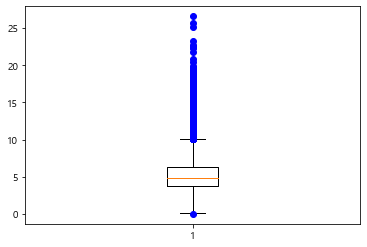

In [9]:
# 데이터 값이 한쪽으로 치중되어 있는지 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

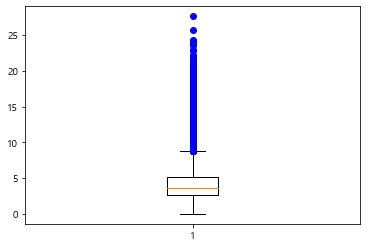

In [10]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

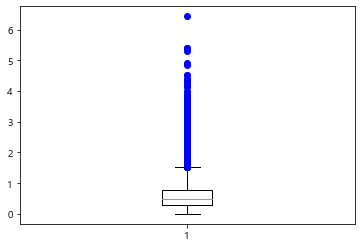

In [11]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

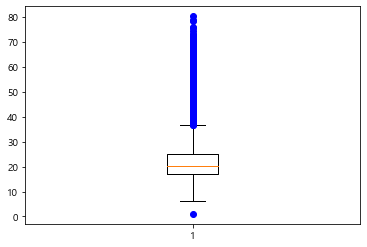

In [12]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime']], sym = 'bo') 
plt.show()

In [13]:
df['physicalDamageDealtToChampionsPerTime_log'] = np.log1p(df['physicalDamageDealtToChampionsPerTime'])
df['magicDamageDealtToChampionsPerTime_log'] = np.log1p(df['magicDamageDealtToChampionsPerTime'])
df['trueDamageDealtToChampionsPerTime_log'] = np.log1p(df['trueDamageDealtToChampionsPerTime'])
df['totalDamageTakenPerTime_log'] = np.log1p(df['totalDamageTakenPerTime'])

df

,matchId,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,...,physicalDamageDealtToChampionsPerTime,magicDamageDealtToChampionsPerTime,trueDamageDealtToChampionsPerTime,totalDamageTakenPerTime,teamId,win,physicalDamageDealtToChampionsPerTime_log,magicDamageDealtToChampionsPerTime_log,trueDamageDealtToChampionsPerTime_log,totalDamageTakenPerTime_log
0,KR_4870274470,0,0,0,0,0,0,0,0,0,...,10.628426,12.233673,2.085131,62.743878,100,1,2.453453,2.582765,1.126594,4.154873
1,KR_4901175026,0,0,1,0,0,0,0,0,0,...,4.162932,5.258645,0.506501,27.531397,100,0,1.641505,1.833964,0.409790,3.351005
2,KR_4944273316,0,0,0,0,0,0,0,0,0,...,4.805683,3.156022,1.564276,18.734506,100,0,1.758837,1.424558,0.941676,2.982369
3,KR_4944293028,0,0,0,0,0,0,0,0,1,...,2.956260,3.478980,0.286553,21.421484,100,0,1.375299,1.499395,0.251967,3.110020
4,KR_4975317218,0,0,0,0,0,0,0,0,0,...,7.795578,1.223639,0.540476,14.443878,100,1,2.174249,0.799145,0.432092,2.737213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,KR_5560971377,1,0,0,0,0,0,0,0,0,...,15.727575,6.313840,2.616649,33.409781,100,1,2.817059,1.989768,1.285548,3.538341
25625,KR_5560971639,0,0,0,0,0,0,0,0,0,...,7.947130,14.110752,0.512854,49.962813,100,1,2.191333,2.715407,0.413998,3.931096
25626,KR_5560972397,0,0,0,0,0,1,0,0,0,...,6.724226,10.574135,1.298361,42.859016,100,0,2.044362,2.448773,0.832196,3.780980
25627,KR_5560981091,0,0,0,0,0,0,0,0,0,...,8.548952,2.311492,0.369143,18.231746,100,1,2.256431,1.197399,0.314185,2.956562


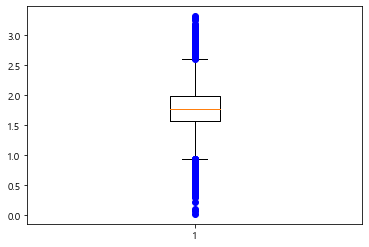

In [14]:
# 잘되었나 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

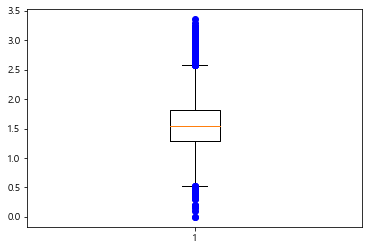

In [16]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

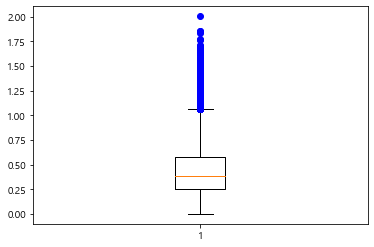

In [17]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

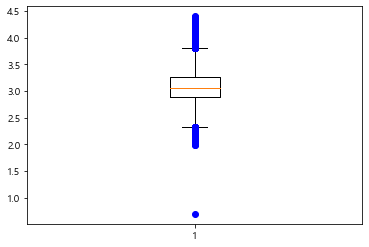

In [18]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime_log']], sym = 'bo') 
plt.show()

In [19]:
# 아웃라이어 drop
df2 = df.query('totalDamageTakenPerTime_log >= 1').reset_index(drop=True)
df2

,matchId,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,...,physicalDamageDealtToChampionsPerTime,magicDamageDealtToChampionsPerTime,trueDamageDealtToChampionsPerTime,totalDamageTakenPerTime,teamId,win,physicalDamageDealtToChampionsPerTime_log,magicDamageDealtToChampionsPerTime_log,trueDamageDealtToChampionsPerTime_log,totalDamageTakenPerTime_log
0,KR_4870274470,0,0,0,0,0,0,0,0,0,...,10.628426,12.233673,2.085131,62.743878,100,1,2.453453,2.582765,1.126594,4.154873
1,KR_4901175026,0,0,1,0,0,0,0,0,0,...,4.162932,5.258645,0.506501,27.531397,100,0,1.641505,1.833964,0.409790,3.351005
2,KR_4944273316,0,0,0,0,0,0,0,0,0,...,4.805683,3.156022,1.564276,18.734506,100,0,1.758837,1.424558,0.941676,2.982369
3,KR_4944293028,0,0,0,0,0,0,0,0,1,...,2.956260,3.478980,0.286553,21.421484,100,0,1.375299,1.499395,0.251967,3.110020
4,KR_4975317218,0,0,0,0,0,0,0,0,0,...,7.795578,1.223639,0.540476,14.443878,100,1,2.174249,0.799145,0.432092,2.737213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25623,KR_5560971377,1,0,0,0,0,0,0,0,0,...,15.727575,6.313840,2.616649,33.409781,100,1,2.817059,1.989768,1.285548,3.538341
25624,KR_5560971639,0,0,0,0,0,0,0,0,0,...,7.947130,14.110752,0.512854,49.962813,100,1,2.191333,2.715407,0.413998,3.931096
25625,KR_5560972397,0,0,0,0,0,1,0,0,0,...,6.724226,10.574135,1.298361,42.859016,100,0,2.044362,2.448773,0.832196,3.780980
25626,KR_5560981091,0,0,0,0,0,0,0,0,0,...,8.548952,2.311492,0.369143,18.231746,100,1,2.256431,1.197399,0.314185,2.956562


# k-평균 군집화모형 구축

In [34]:
# 분석에 사용할 값을 정규 분포로 스케일링
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산
from sklearn.preprocessing import StandardScaler

X_features = df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

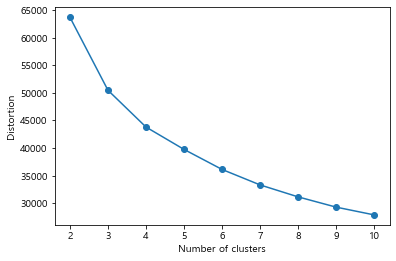

In [35]:
# 엘보 방법으로 클러스터 개수 k 선택
distortions = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [36]:
# 실루엣 계수에 따른 각 군집의 비중 시각화 함수 정의
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

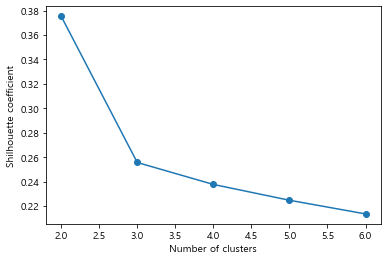

In [37]:
silhouette = []

for i in range(2,7):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    silhouette_values = silhouette_score(X_features_scaled, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,7), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [38]:
# 군집 수에 따른 군집 데이터 분포의 시각화 함수 정의

def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

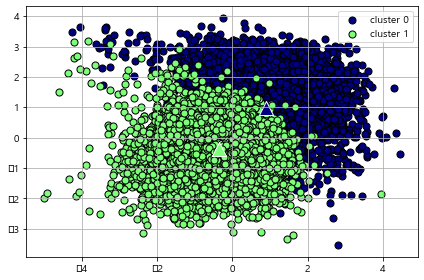

In [39]:
# k = 2
clusterScatter(2, X_features_scaled)

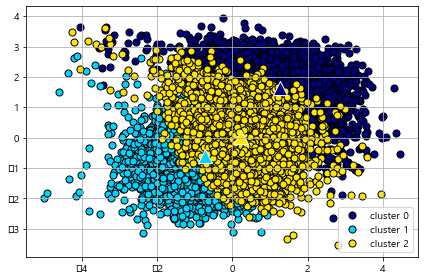

In [40]:
# k = 3
clusterScatter(3, X_features_scaled)

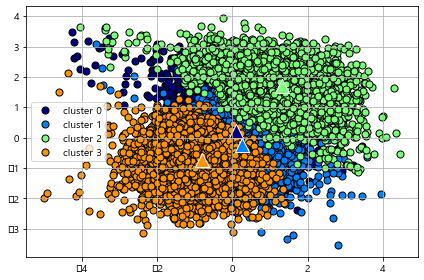

In [41]:
# k = 4
clusterScatter(4, X_features_scaled)

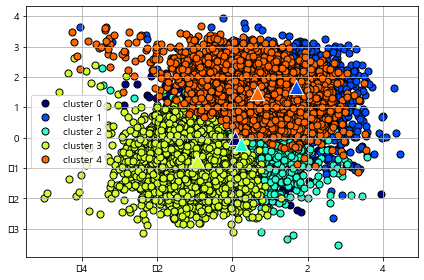

In [42]:
# k = 5
clusterScatter(5, X_features_scaled)

In [44]:
# k = 3 으로 선택하고 진행
best_cluster = 3
kmeans = KMeans(n_clusters = best_cluster, random_state = 0)
Y_labels = kmeans.fit_predict(X_features_scaled)
df2['ClusterLabel'] = Y_labels
df2.head()

,matchId,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,...,magicDamageDealtToChampionsPerTime,trueDamageDealtToChampionsPerTime,totalDamageTakenPerTime,teamId,win,physicalDamageDealtToChampionsPerTime_log,magicDamageDealtToChampionsPerTime_log,trueDamageDealtToChampionsPerTime_log,totalDamageTakenPerTime_log,ClusterLabel
0,KR_4870274470,0,0,0,0,0,0,0,0,0,...,12.233673,2.085131,62.743878,100,1,2.453453,2.582765,1.126594,4.154873,0
1,KR_4901175026,0,0,1,0,0,0,0,0,0,...,5.258645,0.506501,27.531397,100,0,1.641505,1.833964,0.409790,3.351005,2
2,KR_4944273316,0,0,0,0,0,0,0,0,0,...,3.156022,1.564276,18.734506,100,0,1.758837,1.424558,0.941676,2.982369,2
3,KR_4944293028,0,0,0,0,0,0,0,0,1,...,3.478980,0.286553,21.421484,100,0,1.375299,1.499395,0.251967,3.110020,1
4,KR_4975317218,0,0,0,0,0,0,0,0,0,...,1.223639,0.540476,14.443878,100,1,2.174249,0.799145,0.432092,2.737213,1


In [45]:
# 중간 파일 저장
df2.to_csv('lol-clustering.csv')

# 군집별 특징 분석

In [46]:
# 각 군집 별 수 확인
df2.groupby('ClusterLabel')[['matchId']].count()

,matchId
ClusterLabel,
0,3518
1,10017
2,12093


In [53]:
# 모형 구축에 사용된 로그 변수 제거
df3 = df2.drop(['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
       'totalDamageTakenPerTime_log'], axis = 1, inplace = False)

In [54]:
clustering_result = df3.groupby('ClusterLabel').mean()
clustering_result

,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,red_Ashe,...,blue_Ziggs,blue_Zilean,blue_Zoe,blue_Zyra,physicalDamageDealtToChampionsPerTime,magicDamageDealtToChampionsPerTime,trueDamageDealtToChampionsPerTime,totalDamageTakenPerTime,teamId,win
ClusterLabel,,,,,,,,,,,,,,,,,,,,,
0,0.040364,0.037806,0.040648,0.029847,0.033826,0.034110,0.021319,0.017624,0.038943,0.053724,...,0.038374,0.025014,0.036669,0.016202,8.869593,9.895109,1.209732,37.996981,100.0,0.560546
1,0.040930,0.016672,0.028052,0.041829,0.025856,0.032245,0.013876,0.004393,0.112708,0.017570,...,0.034142,0.018069,0.043127,0.006788,3.781232,2.907847,0.334097,16.327241,100.0,0.397025
2,0.053006,0.014306,0.032250,0.037129,0.027537,0.031175,0.018606,0.004217,0.098404,0.021335,...,0.030100,0.016456,0.049450,0.007277,5.684609,4.196722,0.665724,22.476719,100.0,0.571736


In [55]:
# 결과 export
clustering_result.to_csv("clustering_result.csv")